# Fine-tuning LLMs using Hugging Face

In [2]:
from transformers import pipeline, AutoModel, AutoTokenizer
import torch.nn as nn
import torch

# 1. Using the pipeline()

- We can just specify the intended task we want to use the model for
- The pipeline automatically downloads a suitable model and its pre-trained weights
- But there is less possibility to fine-tune something as it is the easiest method to use

### **Sentiment analysis**

In [3]:
sentiment_classifier = pipeline(task = "sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

- Now we can just pass in some text and the pipeline will perform sentiment analysis

In [4]:
prompt1 = sentiment_classifier("This product was of top quality, would recommend again.")
prompt1

[{'label': 'POSITIVE', 'score': 0.9994590878486633}]

In [5]:
prompt2 = sentiment_classifier("The food was good, but the service at the restaurant was not the greatest, still overall quite okay.")
prompt2

[{'label': 'POSITIVE', 'score': 0.9995042085647583}]

### **Text summarization**

In [5]:
summarizer = pipeline(task = "summarization")

text = "Benign tumors may grow and put pressure on organs like the brain. Endocrine tumors may not be cancerous but may cause your body to overproduce hormones. You may need surgery to remove the tumor. Cancer cells can break away from the original tumor. The cells may travel in the bloodstream (circulatory system) or lymphatic system. When cells settle in a new location like an organ or gland, they start multiplying again, creating a new tumor (metastatic cancer). Cancer that spreads can be more challenging to treat."
outputs = summarizer(text, max_length = 30) # Summarises using maximum of 30 words
print(outputs[0]["summary_text"])

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

Your min_length=56 must be inferior than your max_length=30.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1202: UserWarning: Unfeasible length constraints: `min_length` (56) is larger than the maximum possible length (30). Generation will stop at the defined maximum length. You should decrease the minimum length and/or increase the maximum length.
  warnings.warn(


 Benign tumors may grow and put pressure on organs like the brain . Endocrine tumors may not be cancerous but may cause your body


### **Question-Answering**

In [6]:
qa_model = pipeline(task = "question-answering")
question = "For how long was the Eiffel Tower the tallest man-made structure in the world?"
context = "The tower is 324 metres (1,063 ft) tall, about the same height as an 81-storey building, and the tallest structure in Paris. Its base is square, measuring 12.5 metres (410 ft) on each side. During its construction, the Eiffel Tower surpassed the Washington Monument to become the tallest man-made structure in the world, a title it held for 41 years until the Chrysler Building in New York was finished in 1930…"

# Pass the necessary inputs to the LLM pipeline for question-answering
outputs = qa_model(question = question, context = context)

# Access and print the answer
print(outputs["answer"])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 626af31 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/473 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/261M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

41 years


In [9]:
# Create a pipeline for text generation using the gpt2 model
generator = pipeline("text-generation", model = "gpt2")

# The text variable contains a customer review for the Riverview Hotel:
text = "I had a wonderful stay at the Riverview Hotel! The staff were incredibly attentive and the amenities were top-notch. The only hiccup was a slight delay in room service, but that didn't overshadow the fantastic experience I had."
# This is the first sentence of the hotel response to it - we want to generate more sentences tho
response = "Dear valued customer, I am glad to hear you had a good stay with us."

# Build the prompt for the text generation LLM
prompt = f"Customer review:\n{text}\n\nHotel response to the customer:\n{response}"

# Pass the prompt to the model pipeline
outputs = generator(prompt, max_length = 150, pad_token_id = generator.tokenizer.eos_token_id) # Note: the pad_token_id=generator.tokenizer.eos_token_id argument sets the tokenizer padding token ID as the EOS (End Of Speech) token ID

# Print the augmented sequence generated by the model
print(outputs[0]["generated_text"])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Customer review:
I had a wonderful stay at the Riverview Hotel! The staff were incredibly attentive and the amenities were top-notch. The only hiccup was a slight delay in room service, but that didn't overshadow the fantastic experience I had.

Hotel reponse to the customer:
Dear valued customer, I am glad to hear you had a good stay with us. Thanks again for offering good service and a great price. As a reservation is on an individual basis, a reservation fee would not normally apply. However, I do believe you are right because if your reservation goes on, your reservation fee will also go up for everyone. In fact, based on your responses, you should be able to find a reservation


### **Text Translation**

In [8]:
input_text = "Este curso sobre LLMs se está poniendo muy interesante"

# Define pipeline for Spanish-to-English translation
translator = pipeline("translation_es_to_en", model = "Helsinki-NLP/opus-mt-es-en")

# Translate the input text
translations = translator(input_text)

# Access the output to print the translated text in English
print(translations[0]["translation_text"])

config.json:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


This course on LLMs is getting very interesting.


# 2. Using AutoModel() and AutoTokenizer() classes

- So far, we have used the pipeline() method which helps us perform language tasks with very few lines of code, but this comes with less control and customisation - so it accommodates only a limited range of solvable tasks
-	Or we can use the AutoModel() class = it provides a flexible and customisable alternative to leverage pre-trained LLMs at the cost of more complexity by turning some of the pipeline´s automatic steps into manual ones
- But on the bright side, they support very diverse language tasks along with model fine-tuning


- **from_pretrained()** method - Used for loading a specified pre-trained model with its pretrained weights and also loading a suitable tokenizer for that model (tokenizer pre-processes the text into a numerical vector form that the models can digest)
- **model_name** variable - Referred to as a model checkpoint, meaning it is a specific model version uploaded in the hub with its own architecture, configuration and weights (it is basically the pre-trained base model we are beginning with)
- **AutoModel** class - When being passed some inputs for inference, it returns the hidden states produced by the model body but it lacks a task-specific head - so we must include it ourselves (např. a Classification head)

In [2]:
# Loading the pre-trained model and its tokenizer
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

text = "I am an example sequence for text classification."

# Specifying the task-specific head ourselves
class SimpleClassifier(nn.Module):
  def __init__(self, input_size, num_classes):
    super(SimpleClassifier, self).__init__()
    self.fc = nn.Linear(input_size, num_classes)
  def forward(self, x):
    return self.fc(x)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [14]:
# We first tokenize inputs using the tokenizer, enabling padding and sequence truncation when exceeding the specified max. length
inputs = tokenizer(text, return_tensors = "pt", padding = True, truncation = True, max_length = 64) # "pt" indicated that we want the result as PyTorch tensors

# Then we get the model hidden states and aggregate them into a high-lvl representation using ".pooler_output"
outputs = model(**inputs) # double ** means we are unpacking the input´s dictionary
pooled_output = outputs.pooler_output
print("Hidden states size: ", outputs.last_hidden_state.shape)
print("Pooled output size: ", pooled_output.shape)

# The hidden states are then forward-passed through our custom classification head for binary classification
# to obtain raw logits that are mapped into class probabilities using softmax
classifier_head = SimpleClassifier(pooled_output.size(-1), num_classes = 2)
logits = classifier_head(pooled_output)
probs = torch.softmax(logits, dim = 1)
print("Predicted Class Probabilities: ", probs)

Hidden states size:  torch.Size([1, 11, 768])
Pooled output size:  torch.Size([1, 768])
Predicted Class Probabilities:  tensor([[0.4631, 0.5369]], grad_fn=<SoftmaxBackward0>)


**Note:** Some AutoClasses support loading pre-configured models with a task-specific head, eliminating the need to manually add it

### Auto Class for text classification (AutoModelForSequenceClassification)

- The following example loads a BERT-based model for sentiment classification in a 5-star rating scale

In [2]:
from transformers import AutoModelForSequenceClassification

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


- The tokenized inputs are passed to the model which incorporates a classification head to output raw class probabilities or logits

In [27]:
text = "The quality of the product was just okay."
inputs = tokenizer(text, return_tensors = "pt", padding = True)
outputs = model(**inputs)
logits = outputs.logits

predicted_class = torch.argmax(logits, dim = 1).item()
print(f"Predicted class index: {predicted_class + 1} star.")

Predicted class index: 3 star.


### Auto Class for text generation (AutoModelForCausalLM)

In [3]:
from transformers import AutoModelForCausalLM

model_name = "gpt2" # gpt2 is a pre-configured model for language generation
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

In [5]:
prompt = "This is a simple example for text generation,"

# We firstly need to encode the input
inputs = tokenizer.encode(prompt, return_tensors = "pt")

# The model generates the text and outputs a specified nr. of follow-up tokens
with torch.no_grad():     # When code is executed within this context, it temporarily disables gradient computation- so any operations inside the torch.no_grad() block won't be included in the computation graph, and gradients won't be calculated. This is often used during inference or evaluation to reduce memory consumption and speed up the process since gradients are not needed for these operations
  output = model.generate(inputs, max_length = 26)

# These outputs are then decoded to obtain back the generated text
generated_text = tokenizer.decode(output[0], skip_special_tokens = True)
print("Generated Text:")
print(generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:
This is a simple example for text generation, but it's also a good way to get a feel for how the text is generated


## Hugging Face also provides a dataset library

- it includes an extensive catalogue of readily available datasets for a variety of language tasks
- many datasets in the catalogue are suitable for text generation

In [6]:
! pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00


In [7]:
from datasets import load_dataset
from torch.utils.data import DataLoader

dataset = load_dataset("imdb")
dataset

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [8]:
train_data = dataset["train"]
dataloader = DataLoader(train_data, batch_size = 2, shuffle = True)

# Printing just the first 5
for batch_idx, batch in enumerate(dataloader):
    if batch_idx >= 5:
        break  # Break the loop after the first 5 batches

    for i in range(len(batch["text"])):
        print(f"Example {i + 1} from Batch {batch_idx + 1}:")
        print("Text:", batch["text"][i])
        print("Label:", batch["label"][i])

Example 1 from Batch 1:
Text: and anyone who watches this film will agree. This film was directed in the days when plot, character believability and theme actually mattered.<br /><br />Jean Peters, Widmark, and Thelma Ritter steal the spotlight. Ritter is in top form as informer "Moe" she survives in the Bowery section of NY, acting as a stool pigeon for NYC police.<br /><br />The only other film in which I have seen Peters is "Niagara", and she certainly proves her acting ability here, complete with Brooklyn accent. Widmark is appropriately menacing, as the anti-hero who must discern what the right thing is, despite his need for cash.<br /><br />The photography is brilliant. The neon, the subway station (though it looks cleaner than the real thing!) the harbor shack where Widmark lives as a transient. Excellent use is made of the city, with "Lightning Louie" in Chinatown; the many flavors and appetites of the city are addressed here; the political climate of the time is a haunting bac

## Text Summarization

- Training a model for this task requires input-target pairs where both the input and the target are sequences, containing an original text and its associated summarized text respectively

**Extractive summarization** - extracts and combines parts of the original text to create a summary, by using encoder models like BERT or sometimes encoder-decoder models like T5

**Abstractive summarization** - relies on sequence-to-sequence LLMs to generate a summary word by word (the summary may use different words or sentence structures than those in the original text)

In [9]:
# We will look at a specific Hugging Face dataset for summarization
dataset = load_dataset("ILSUM/ILSUM-1.0", "English")
print(f"Features: {dataset['train'].column_names}")

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Features: ['id', 'Article', 'Heading', 'Summary']


- This dataset contains 4 attributes (ID, Article, Heading, Summary)
- Article and Summary are key for training
- Article = the long text (input sequence for the LLM)
- Summary = used as the training label for testing predictions

In [10]:
example = dataset["train"][21]
example["Article"]

'This is how an Apple Watch saved a man\'s life after detecting accidentIt all started when Gabe Burdett was waiting for his father Bob at their pre-designated location for some mountain biking at the Riverside State Park when he received a text alert from his dad\'s Apple Watch, saying it had detected a "hard fall".Burdett, from city of Spokane in Washington State later received another update from the Watch, saying his father had reached Sacred Heart Medical Center."We drove straight there but he was gone when we arrived. I get another update from the Watch saying his location has changed with a map location of SHMC. Dad flipped his bike at the bottom of Doomsday, hit his head and was knocked out until sometime during the ambulance ride," Burdett wrote in a Facebook post.The Watch notified 911 with the location and within 30 minutes, emergency medical services (EMS) took the injured Bob to the hospital."If you own an Apple Watch, set up your hard fall detection, it\'s not just for wh

In [11]:
example["Summary"]

'“Dad flipped his bike at the bottom of Doomsday, hit his head and was knocked out until sometime during the ambulance ride. The watch had called 911 with his location and EMS had him scooped up and to the hospital in under a 1/2 hr,” says Gabe in his post.'

In [12]:
# We will be using a pre-trained encoder-decoder LLM called T5
from transformers import AutoModelForSeq2SeqLM

model_name = "t5-small"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [24]:
# We specify we want to perform summarization by adding a task-specific prefix "summarize: " to our input example
input_ids = tokenizer.encode("summarize: " + example["Article"], return_tensors = "pt", max_length = 512, truncation = True)

# The model generates the text and outputs a specified nr. of follow-up tokens
with torch.no_grad():     # When code is executed within this context, it temporarily disables gradient computation- so any operations inside the torch.no_grad() block won't be included in the computation graph, and gradients won't be calculated. This is often used during inference or evaluation to reduce memory consumption and speed up the process since gradients are not needed for these operations
  summary_ids = model.generate(input_ids, max_length = 100)

# Decoding the generated summary back into readable text
summary = tokenizer.decode(summary_ids[0], skip_special_tokens = True)

In [25]:
print("Original Text: ")
print(example["Article"])

Original Text: 
This is how an Apple Watch saved a man's life after detecting accidentIt all started when Gabe Burdett was waiting for his father Bob at their pre-designated location for some mountain biking at the Riverside State Park when he received a text alert from his dad's Apple Watch, saying it had detected a "hard fall".Burdett, from city of Spokane in Washington State later received another update from the Watch, saying his father had reached Sacred Heart Medical Center."We drove straight there but he was gone when we arrived. I get another update from the Watch saying his location has changed with a map location of SHMC. Dad flipped his bike at the bottom of Doomsday, hit his head and was knocked out until sometime during the ambulance ride," Burdett wrote in a Facebook post.The Watch notified 911 with the location and within 30 minutes, emergency medical services (EMS) took the injured Bob to the hospital."If you own an Apple Watch, set up your hard fall detection, it's not

In [26]:
print("\nGenerated Summary:")
print(summary)


Generated Summary:
a man was waiting for his father when he received a text alert from his dad's apple watch. the watch notified 911 with the location and within 30 minutes, emergency medical services took the injured Bob to the hospital. the watch notified 911 with the location and within 30 minutes, emergency medical services took the injured Bob to the hospital.


## Text Translation

In [40]:
dataset = load_dataset("techiaith/legislation-gov-uk_en-cy")
sample_data = dataset["train"]

input_example = sample_data.data["source"][0]
target_example = sample_data.data["target"][0]

print("Input (English): ", input_example)
print("Target (Welsh): ", target_example)

Input (English):  2 Regulations under section 1: supplementary
Target (Welsh):  2 Rheoliadau o dan adran 1: atodol


Now we will be loading a much more specialised model trained for translating English text to Welsh text

In [41]:
model_name = "Helsinki-NLP/opus-mt-en-cy"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/779k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/782k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.15M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/290M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [42]:
# Input text we wanna translate
input_seq = "2 Regulations under section 1: supplementary"

# Encoding the input text
input_ids = tokenizer.encode(input_seq, return_tensors = "pt") # the "pt" means we will get back PyTorch tensors

# Performing the model translation
with torch.no_grad():     # When code is executed within this context, it temporarily disables gradient computation- so any operations inside the torch.no_grad() block won't be included in the computation graph, and gradients won't be calculated. This is often used during inference or evaluation to reduce memory consumption and speed up the process since gradients are not needed for these operations
  translated_ids = model.generate(input_ids)

# Decoding the model translation
translated_text = tokenizer.decode(translated_ids[0], skip_special_tokens = True)

print("Predicted (Welsh): ", translated_text)

Predicted (Welsh):  2 Rheloiad o dan adran 1:aryary" means "i


Now we will be translating from English to Spanish:

In [44]:
model_name = "Helsinki-NLP/opus-mt-en-es"

# Load the tokenizer and the model checkpoint
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [45]:
english_inputs = ["Hello", "Thank you", "How are you?", "Sorry", "Goodbye"]

# Encode the inputs, generate translations, decode, and print them
for english_input in english_inputs:
    input_ids = tokenizer.encode(english_input, return_tensors="pt")
    translated_ids = model.generate(input_ids)
    translated_text = tokenizer.decode(translated_ids[0], skip_special_tokens=True)
    print(f"English: {english_input} | Spanish: {translated_text}")

English: Hello | Spanish: Hola.
English: Thank you | Spanish: Gracias.
English: How are you? | Spanish: ¿Cómo estás?
English: Sorry | Spanish: Lo siento.
English: Goodbye | Spanish: Adiós.


## Question Answering (QA) LLMs

1) **Extractive QA** - The model receives a questions together with a context and the answer must be extacted directly from the context.
- This requires an encoder architecture

2) **Open Generative QA** - Also received a context but it applies language generation to build the answer with the aid of the context instead of extracting the answer as part of the context
- Relies on encode-decoded approach

3) **Closed Generative QA** - It fully generates the answer upon the model´s knowledge without any context
- Relies on decoder approach

In [46]:
mlqa = load_dataset("xtreme", name = "MLQA.en.en")
print(mlqa)

Generating test split:   0%|          | 0/11590 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1148 [00:00<?, ? examples/s]

DatasetDict({
    test: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 11590
    })
    validation: Dataset({
        features: ['id', 'title', 'context', 'question', 'answers'],
        num_rows: 1148
    })
})


In [47]:
# Accessing the 3 important attributes for 1 instance in the test dataset
print("Question:", mlqa["test"]["question"][53])
print("Answer:", mlqa["test"]["answers"][53])
print("Context", mlqa["test"]["context"][53])

Question: what is a kimchi?
Answer: {'answer_start': [271], 'text': ['a fermented, usually spicy vegetable dish']}
Context Korean cuisine is largely based on rice, noodles, tofu, vegetables, fish and meats. Traditional Korean meals are noted for the number of side dishes, banchan (반찬), which accompany steam-cooked short-grain rice. Every meal is accompanied by numerous banchan. Kimchi (김치), a fermented, usually spicy vegetable dish is commonly served at every meal and is one of the best known Korean dishes. Korean cuisine usually involves heavy seasoning with sesame oil, doenjang (된장), a type of fermented soybean paste, soy sauce, salt, garlic, ginger, and gochujang (고추장), a hot pepper paste. Other well-known dishes are Bulgogi (불고기), grilled marinated beef, Gimbap (김밥), and Tteokbokki (떡볶이), a spicy snack consisting of rice cake seasoned with gochujang or a spicy chili paste.


In [52]:
model_ckp = "deepset/minilm-uncased-squad2"
tokenizer = AutoTokenizer.from_pretrained(model_ckp)

question = "How is the taste of wasabi?"
context = """Japanese cuisine captures the essence of a harmonious fusion between fresh ingredients and traitional culinary techniques, all heightened by the zesty taste of the aromatic green condinent known as wasabi."""

inputs = tokenizer(question, context, return_tensors = "pt")

print("First five encoded tokens: ", inputs["input_ids"][0][:5])

First five encoded tokens:  tensor([ 101, 2129, 2003, 1996, 5510])


In [50]:
from transformers import AutoModelForQuestionAnswering

model = AutoModelForQuestionAnswering.from_pretrained(model_ckp)

# Doing the forward-pass for inference
with torch.no_grad():
  outputs = model(**inputs)

# Post-processing the raw outputs, analysing the start and end logits for every input token, extracting the most likely answer location and decoding the answer
start_idx = torch.argmax(outputs.start_logits)
end_idx = torch.argmax(outputs.end_logits) + 1 # Adding 1 to ensure the last token in the answer is included

answer_span = inputs["input_ids"][0][start_idx:end_idx]
answer = tokenizer.decode(answer_span)

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

Some weights of the model checkpoint at deepset/minilm-uncased-squad2 were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [51]:
# Managing long context sequences
long_exmp = tokenizer(example_qt, example_ct, return_overflowing_tokens = True, max_length = 100, stride = 25)

for idx, window in enumerate(long_exmp["input_ids"]):
  print("Tokens in window ", idx, ": ", len(window))

NameError: name 'example_qt' is not defined

In [ ]:
for window in long_exmp["input_ids"]:
  print(tokenizer.decode(window), "\n")

# 3. LLM Fine-Tuning and Transfer Learning

There are 2 approaches:

1) **Full fine-tuning** - Updating weights across the entire model

2) **Partial fine-tuning** - Weights in the lower layers of the model body responsible for capturing general language understanding remain fixed, and we are updating task-specific layers in the model head only

**Transfer learning** - Taking a previously trained model on 1 task and adapting it on a different but related task

In [9]:
# Loading our pre-trained model and tokenizer (např. a general BERT-based model for text classification)
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
# Loading and tokenizing the dataset we will use for fine-tuning (a specific dataset for a specific data)
def tokenize_function(examples):
  return tokenizer(examples["text"], padding = "max_length", truncation = True)

data = load_dataset("imdb")
tokenized_data = data.map(tokenize_function, batched = True) # We are processing examples in batches

Map:   0%|          | 0/25000 [00:00<?, ? examples/s]

In [18]:
from transformers import Trainer, TrainingArguments

# Customising our training settings
training_args = TrainingArguments(output_dir = "./smaller_bert_finetuned",
                                  per_device_train_batch_size = 8,
                                  num_train_epochs = 3,
                                  evaluation_strategy = "steps",
                                  eval_steps = 500,
                                  save_steps = 500,
                                  logging_dir = "./logs")

# Specifying the model, training arguments, training and validation sets
trainer = Trainer(model = model,
                  args = training_args,
                  train_dataset = tokenize_datasets["train"],
                  eval_dataset = tokenized_datasets["test"],
                  compute_metrics = compute_metrics)

# Executing the training loop
trainer.train()

ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
# After the training loop is finalised, we can perform inference on new inputs
example_input = tokenizer("I am absolutely amazed with this new and revolutionary AI device", return_tensors = "pt")
output = model(**example_input)

predicted_label = torch.argmax(output.logits, dim = 1).item()
print("Predicted Label:", predicted_label)

In [19]:
model.save_pretrained("./my_bert_finetuned")
# Although the tokenizer has not changed as a result of fine-tuning, it is a good practise to save it alongside the fine-tuned model
tokenizer.save_pretrained("./my_bert_finetuned")

<bound method PreTrainedModel.save_pretrained of DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
            (lin1): Linear(in_features=768, out_features=3072, bias=True)
            (lin2): Linear(in_features=3072, out_features=768, bias=True)
            (activation): GELUActivation()
          )
          (output_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        )
      )
    )
  )
  (pre_classifier): Linear(in_features=768, out_features=768, bias=True)
  (classifier): Linear(in_features=768, out_features=2, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)>

In [ ]:
input_texts = ["It's dark and rainy outside", "I love penguins!"]

# Tokenize the input sequences and pass them to the model
inputs = tokenizer(input_texts, return_tensors = "pt", padding = True, truncation = True)

with torch.no_grad():     # When code is executed within this context, it temporarily disables gradient computation- so any operations inside the torch.no_grad() block won't be included in the computation graph, and gradients won't be calculated. This is often used during inference or evaluation to reduce memory consumption and speed up the process since gradients are not needed for these operations
  outputs = model(**inputs)

# Obtain class labels from raw predictions
predicted_labels = torch.argmax(outputs.logits, dim = 1).tolist()

for i, predicted_label in enumerate(predicted_labels):
    print(f"\n Input Text {i + 1}: {input_texts[i]}")
    print(f"Predicted Label: {predicted_label}")

# 4. Evaluating LLMs

### Sentiment Analysis Evaluation

In [20]:
from sklearn.metrics import accuracy_score

# Inserting a pipeline
sentiment_analysis = pipeline("sentiment-analysis")

# Defining 4 test examples with labels
test_examples = [{"text": "I love this product!", "label": 1},
                 {"text": "The service was terrible.", "label": 0},
                 {"text": "This movie was amazing.", "label": 1},
                 {"text": "I am dissapointed with the quality.", "label": 0}]

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [22]:
predictions = sentiment_analysis([example["text"] for example in test_examples])
predictions

[{'label': 'POSITIVE', 'score': 0.9998855590820312},
 {'label': 'NEGATIVE', 'score': 0.9996507167816162},
 {'label': 'POSITIVE', 'score': 0.9998819828033447},
 {'label': 'NEGATIVE', 'score': 0.9796290993690491}]

In [30]:
true_labels = [example["label"] for example in test_examples]
predicted_labels = [1 if pred["label"] == "POSITIVE" else 0 for pred in predictions]

accuracy = accuracy_score(true_labels, predicted_labels)
accuracy

1.0

- All the predictions were correct

In [31]:
# Printing results
for example, pred_label in zip (test_examples, predicted_labels):
  print(f"Text: {example['text']}, Prediction: {pred_label}")

print(f"Accuracy: {accuracy}")

Text: I love this product!, Prediction: 1
Text: The service was terrible., Prediction: 0
Text: This movie was amazing., Prediction: 1
Text: I am dissapointed with the quality., Prediction: 0
Accuracy: 1.0


In [27]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 633.4 kB/s eta 0:00:00


In [32]:
import evaluate

# Loading different evaluation metrics
accuracy = evaluate.load("accuracy")
precision = evaluate.load("precision")
recall = evaluate.load("recall")
f1 = evaluate.load("f1")

real_labels = [0, 1, 0, 1, 1]
predicted_labels = [0, 0, 0, 1, 1]

print(accuracy.compute(references = real_labels, predictions = predicted_labels))
print(precision.compute(references = real_labels, predictions = predicted_labels))
print(recall.compute(references = real_labels, predictions = predicted_labels))
print(f1.compute(references = real_labels, predictions = predicted_labels))

{'accuracy': 0.8}
{'precision': 1.0}
{'recall': 0.6666666666666666}
{'f1': 0.8}


### More complex LLM tasks and their respective metrics

- Each metric has its advantages and limitations

### **Text Generation**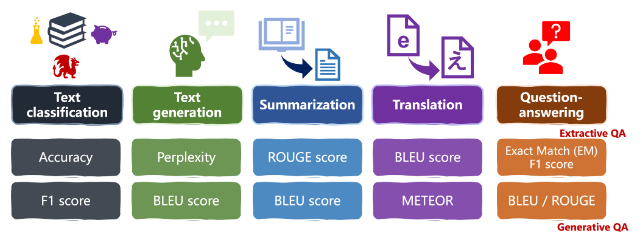

#### **PERPLEXITY score (Text generation)**

= Measures the model´s ability to predict the next word accurately and confidently

- It is calculated upon model´s output logits
- ranges from 0 to infinity where lower is better
- We often use "mean_perplexity" = average perplexity of the sequences

In [38]:
model_name = "gpt2" # gpt2 is a pre-configured model for language generation
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

In [39]:
prompt = "Current trends show that by 2030"

# Encode the prompt, generate text and decode it
prompt_ids = tokenizer.encode(prompt, return_tensors = "pt")
output = model.generate(prompt_ids, max_length = 20)
generated_text = tokenizer.decode(output[0], skip_special_tokens = True)

print("Generated Text: ", generated_text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Generated Text:  Current trends show that by 2030, the number of people living in poverty will be at its lowest level


In [41]:
perplexity = evaluate.load("perplexity", module_type = "metric")
results = perplexity.compute(model_id = "gpt2", predictions = generated_text)
print("Perplexity: ", results["mean_perplexity"])

  0%|          | 0/7 [00:00<?, ?it/s]

Perplexity:  3441.665548706055


- We should compare perplexity with different models or with a baseline model

#### **ROUGE score (Text summarization)**

= it quantifies the overlap between generated summary and the reference summaries

In [43]:
pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24933 sha256=f63defaae134771d4f2e1bc477f3b8f8bef0394c50b5e7588037001a50b9251b
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [44]:
rouge = evaluate.load("rouge")

# This is a prediction from our LLM model
predictions = ["""Pluto is a dwarf planet in our solar system, located in the Kuiper Belt beyond Neptune, and was formerly considered the ninth planet until its reclassification in 2006."""]

# This is a reference text sumarization done by humans
references = ["""Pluto is a dwarf planet in the solar system, located in the Kuiper Belt beyond Neptune, and was previously deemed as a planet until it was reclassified in 2006."""]

results = rouge.compute(predictions = predictions, references = references)
print("ROUGE results: ", results)

ROUGE results:  {'rouge1': 0.7719298245614034, 'rouge2': 0.6181818181818182, 'rougeL': 0.736842105263158, 'rougeLsum': 0.736842105263158}


#### **BLEU score (Text translation)**

= measures translation quality as the correspondence between an LLM output and one or more human references

In [35]:
bleu = evaluate.load("bleu")

# Loading the Spanish-to-English translation pipeline
translator = pipeline("translation", model = "Helsinki-NLP/opus-mt-es-en")

# The Spanish input we want to translate
input = "Qué hermoso dia"

# The human references we have for comparing what is a good translation and what is not
references = [["What a gorgeous day", "What a beautiful day"]]

# Using the model to translate it
translated_outputs = translator(input)
translated_sentence = translated_outputs[0]["translation_text"]
print("Translation: ", translated_sentence)

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:197: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


Translation:  What a beautiful day.


In [36]:
results_bleu = bleu.compute(predictions = [translated_sentence], references = references)
print(results_bleu)

{'bleu': 0.668740304976422, 'precisions': [0.8, 0.75, 0.6666666666666666, 0.5], 'brevity_penalty': 1.0, 'length_ratio': 1.25, 'translation_length': 5, 'reference_length': 4}


#### **METEOR score (Text translation)**

= overcomes the ROUGE and BLEU limitations by comprehensively assessing:

- N-gram overlap, precision, recall, synonyms, stemming, word order
- It is more computationally expensive

In [37]:
meteor = evaluate.load("meteor")

results_meteor = meteor.compute(predictions = [translated_sentence], references = references)
print(results_meteor)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


{'meteor': 0.9679878048780488}


#### **EXACT MATCH (EM) score (Question-Answering)**

- EM = 1 if an LLM´s output exactly matches its reference answer

- EM = 0 otherwise

Due to EM being a highly sensitive metric, it is often used together with F1 scores rather than in isolation

In [ ]:
exact_match = evaluate.load("exact_match")

predictions = ["...", "...", "..."]

references = ["...", "...", "..."]

results = exact_match.compute(references = references, predictions = predictions)
print(results)

# 5. Fine-Tuning using human feedback

- Determining whether an LLM performance and outputs are good should rely not only on objective metrics but also on subjective and context-dependent criteria
- For example (are we looking for truthful results? Do we want a detailed or a concise answer?)

# 6. Pushing our dataset to the Hugging Face hub

Before you can do this, you must:

- Have an account on the Hugging Face website
- Generate a token on the Hugging Face hug

In [ ]:
import os

# Assigning your Hugging Face Token to a variable hf_token
hf_token = os.environ["Your token name"]

# Login to the HF hug using your hf_token
hf_hub.login(hf_token)

In [ ]:
# Pushing the new / improved dataset to the hub
your_username = "blabla"
new_dataset.push_to_hub(f"{your_username}/name of your dataset")